In [9]:
# Import packages.
using JuMP, SCS, Mayday, Mosek, Plots

In [10]:
m = Model(solver=MosekSolver())
#m = Model(solver=SCSSolver(max_iters = 80000))

# Set up variables for the amount of energy used by each transmitter.
@variable(m, γ)
@variable(m, ψ)

x = generator(:x)
y = generator(:y)

# Minimize the amount of overall energy used by the transmitters.
@objective(m, Min, γ + ψ)

# The polynomial that must be nonnegative on the constraint sets. 
p(x,y) = -10((x-1)^2+ (y-1.5)^2)*((x-2)^2 + (y-1)^2) + γ*((x-2)^2 + (y-1)^2) + ψ*((x-1)^2 + (y-1.5)^2)

# Define sos polynomials to use for our polynomial equality constraint.
d1 = defSoSPolynomial(m, [:x, :y], 1)
d2 = defSoSPolynomial(m, [:x, :y], 1)
d3 = defSoSPolynomial(m, [:x, :y], 1)
d4 = defSoSPolynomial(m, [:x, :y], 1)
d5 = defSoSPolynomial(m, [:x, :y], 1)

# The g_i's for each of the ellipsoids.
g1(x,y) = 0.01-3(x-1.1)^2-2(x-1.1)*(y-1.75)-(y-1.75)^2
g2(x,y) = 0.01-(x-1.25)^2-3(y-2)^2
g3(x,y) = 0.01-(x-1.5)^2-(y-1.75)^2
g4(x,y) = 0.01-(x-1.8)^2+2*(x-1.8)*(y-1.8)-3*(y-1.8)^2
g5(x,y) = 0.02-5(x-2)^2-(y-1.4)^2

# The sos equality constraints for each ellipsoid.
addSoSConstraint(m, p(x,y) - d1*g1(x,y))
addSoSConstraint(m, p(x,y) - d2*g2(x,y))
addSoSConstraint(m, p(x,y) - d3*g3(x,y))
addSoSConstraint(m, p(x,y) - d4*g4(x,y))
addSoSConstraint(m, p(x,y) - d5*g5(x,y))

m

Stacktrace:
 [1] depwarn(::String, ::Symbol) at .\deprecated.jl:70
 [2] Array(::Type{Int64}, ::Int64, ::Int64) at .\deprecated.jl:57
 [3] MultiPoly.PolyUnion(::Array{MultiPoly.MPoly{Float64},1}) at C:\Users\Michael\.julia\v0.6\MultiPoly\src\polyunion.jl:9
 [4] *(::MultiPoly.MPoly{Float64}, ::MultiPoly.MPoly{Float64}) at C:\Users\Michael\.julia\v0.6\MultiPoly\src\mpolyarithmetic.jl:63
 [5] _mapreduce(::Base.#identity, ::Base.#*, ::IndexLinear, ::Array{MultiPoly.MPoly{Float64},1}) at .\reduce.jl:273
 [6] _collect(::Array{Array{Int64,1},1}, ::Base.Generator{Array{Array{Int64,1},1},Mayday.##1#3{Array{Symbol,1},Mayday.#monomial}}, ::Base.EltypeUnknown, ::Base.HasShape) at .\array.jl:488
 [7] defSoSPolynomial(::JuMP.Model, ::Array{Symbol,1}, ::Int64) at C:\Users\Michael\.julia\v0.6\Mayday\src\Mayday.jl:83
 [8] include_string(::String, ::String) at .\loading.jl:522
 [9] include_string(::Module, ::String, ::String) at C:\Users\Michael\.julia\v0.6\Compat\src\Compat.jl:71
 [10] execute_request(:

Stacktrace:
 [1] depwarn(::String, ::Symbol) at .\deprecated.jl:70
 [2] Array(::Type{Int64}, ::Int64, ::Int64) at .\deprecated.jl:57
 [3] MultiPoly.PolyUnion(::Array{MultiPoly.MPoly{Float64},1}) at C:\Users\Michael\.julia\v0.6\MultiPoly\src\polyunion.jl:9
 [4] *(::MultiPoly.MPoly{Float64}, ::MultiPoly.MPoly{Float64}) at C:\Users\Michael\.julia\v0.6\MultiPoly\src\mpolyarithmetic.jl:63
 [5] ^(::MultiPoly.MPoly{Float64}, ::Int64) at C:\Users\Michael\.julia\v0.6\MultiPoly\src\mpolyarithmetic.jl:92
 [6] p(::MultiPoly.MPoly{Float64}, ::MultiPoly.MPoly{Float64}) at .\In[10]:15
 [7] include_string(::String, ::String) at .\loading.jl:522
 [8] include_string(::Module, ::String, ::String) at C:\Users\Michael\.julia\v0.6\Compat\src\Compat.jl:71
 [9] execute_request(::ZMQ.Socket, ::IJulia.Msg) at C:\Users\Michael\.julia\v0.6\IJulia\src\execute_request.jl:158
 [10] (::Compat.#inner#17{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at C:\Users\Michael\.julia\v0.6\Compat\src\Com

Minimization problem with:
 * 75 linear constraints
 * 10 semidefinite constraints
 * 227 variables
Solver is Mosek

In [11]:
solve(m)

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 300             
  Cones                  : 0               
  Scalar variables       : 227             
  Matrix variables       : 10              
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 165
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimiz

:Optimal

In [12]:
c1 = getvalue(γ)

2.5543808184107966

In [13]:
c2 = getvalue(ψ)

5.563539437123734

In [14]:
pyplot();


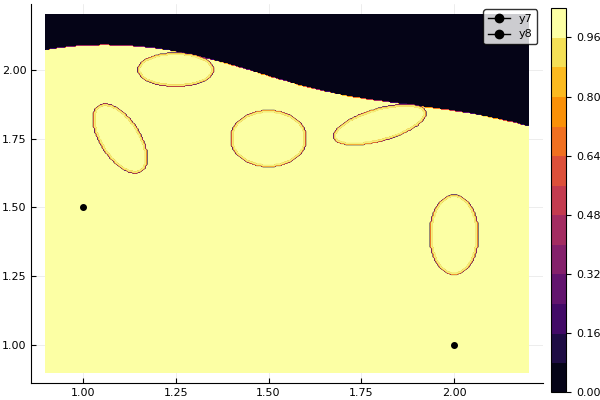

In [15]:
x = 0.9:0.004:2.2
y = 0.9:0.004:2.2
f(x,y) = c1/((x-1)^2 + (y-1.5)^2) + c2/((x-2)^2 + (y-1)^2)
g1(x,y) = 3(x-1.1)^2+2(x-1.1)*(y-1.75)+(y-1.75)^2
g2(x,y) = (x-1.25)^2+3(y-2)^2
g3(x,y) = (x-1.5)^2+(y-1.75)^2
g4(x,y) = (x-1.8)^2-2*(x-1.8)*(y-1.8)+3*(y-1.8)^2
g5(x,y) = 5(x-2)^2+(y-1.4)^2
X = repmat(x',length(y),1)
Y = repmat(y,1,length(x))
Z = map(f,X,Y)
Z1 = map(g1,X,Y)
Z2 = map(g2,X,Y)
Z3 = map(g3,X,Y)
Z4 = map(g4,X,Y)
Z5 = map(g5,X,Y)
p2 = contour(x, y, Z.>=10, fill=true)
contour!(x, y, Z1.<=0.01)
contour!(x, y, Z2.<=0.01)
contour!(x, y, Z3.<=0.01)
contour!(x, y, Z4.<=0.01)
contour!(x, y, Z5.<=0.02)
plot!([1], [1.5], marker=:dot, color=:black)
plot!([2], [1], marker=:dot, color=:black)

In [16]:
c1 + c2

8.11792025553453

In [21]:
x = 0.9:0.005:2.1
y = 0.9:0.005:2.1
function f(x,y)
    c1, c2 = 2.5543781246902038, 5.563542106302917
    m = min(norm([x,y] - [1, 1.5]), norm([x,y] - [1, 1.5]))
    if m < 1e-1
        return 100.
    else
        return c1/((x-1)^2 + (y-1.5)^2) + c2/((x-2)^2 + (y-1)^2)
    end
end
g1(x,y) = 3(x-1.1)^2+2(x-1.1)*(y-1.75)+(y-1.75)^2
g2(x,y) = (x-1.25)^2+3(y-2)^2
g3(x,y) = (x-1.5)^2+(y-1.75)^2
g4(x,y) = (x-1.8)^2-2*(x-1.8)*(y-1.8)+3*(y-1.8)^2
g5(x,y) = 5(x-2)^2+(y-1.4)^2
p1 = plot(x, y, f, typ=:contour, levels=5:5:30, clabels=true, style=:dot)
plot([1], [1.5], marker=:dot, color=:black)
plot!([2], [1], marker=:dot, color=:black)
contour!(x, y, g1, levels=[.01])
contour!(x, y, g2, levels=[.01])
contour!(x, y, g3, levels=[.01])
contour!(x, y, g4, levels=[.01])
contour!(x, y, g5, levels=[.02])
plot!(p1, size=(800, 700), legend=false)
Plots.pdf(p1, "fig")
p1

LoadError: [91msyntax: extra token "f" after end of expression[39m